# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')        

## Have a look at the general data:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/24/20  8/25/20  8/26/20  \
0        0        0        0        0  ...    38054    38070    38113   
1        0        0        0        0  ...     8605     8759     8927   
2        0        0        0        0  ...    41858    42228    42619   
3        0        0        0        0  ...     1060     1060     1098   
4        0        0        0        0  ...     2222     2283     2332   

   8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  9/1/20  9/2/20  
0    38129    38140    38143    38162    38165   38196   38243  
1     9083     9195     9279     9380     9513    9606    9728  
2    43016    43403    43781    44146    44494   44833   45158  
3     1098     1124     1124     1124     1176    1184    1199  
4     2415     2471     2551     2624     2654    2729    2777  

[5 rows x 229 columns]

In [5]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/24/20  8/25/20  8/26/20  \
0        0        0        0        0  ...     1389     1397     1401   
1        0        0        0        0  ...      254      259      263   
2        0        0        0        0  ...     1446     1456     1465   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...      100      102      103   

   8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  9/1/20  9/2/20  
0     1401     1402     1402     1402     1402    1406    1409  
1      266      271      275      280      284     290     296  
2     1475     1483     1491     1501     1510    1518    1523  
3       53       53       53       53       53      53      53  
4      105      106      107      107      108     109     112  

[5 rows x 229 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/24/20  8/25/20  8/26/20  \
0        0        0        0        0  ...    28360    28440    29042   
1        0        0        0        0  ...     4413     4530     4633   
2        0        0        0        0  ...    29369    29587    29886   
3        0        0        0        0  ...      877      877      893   
4        0        0        0        0  ...      877      977      977   

   8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  9/1/20  9/2/20  
0    29046    29059    29063    29089    29089   29231   29315  
1     4791     4923     5020     5139     5214    5441    5582  
2    30157    30436    30717    30978    31244   31493   31746  
3      893      902      902      902      908     908     909  
4     1335     1028     1041     1063     1071    1084    1115  

[5 rows x 229 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#calculate the number of total[cases, deaths, recovered, active]
for col in confirmed.columns:
    total_cases.append(sum(confirmed[col]))
    total_deaths.append(sum(deaths[col]))
    total_recovered.append(sum(recoveries[col]))
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

#calculate the mortarity rate and recovery rate
for i in range(len(total_cases)):
    mortality_rate.append(total_deaths[i]/total_cases[i])
    recovery_rate.append(total_recovered[i]/total_cases[i])

In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])
print("The lastest mortality rate of total cases: ", mortality_rate[-1])
print("The lastest recovery rate of total cases: ", recovery_rate[-1])

Total confirmed cases:  26031410
Total death cases:  863028
Total recoveries cases:  17291874
Total active cases:  7876508
The lastest mortality rate of total cases:  0.03315333283905866
The lastest recovery rate of total cases:  0.6642695881629155


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

<Figure size 432x288 with 0 Axes>

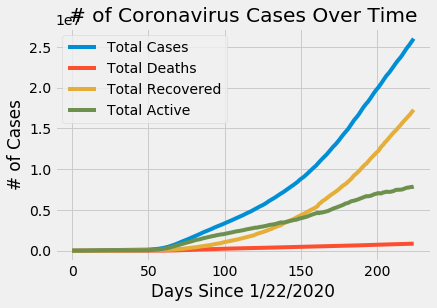

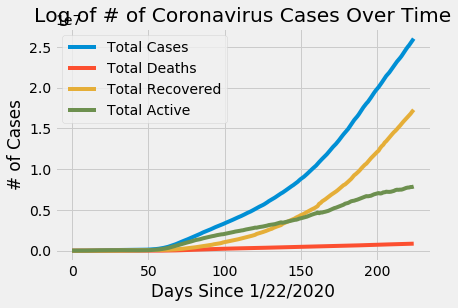

In [9]:
df = pd.DataFrame({'Total Cases': total_cases
                   ,'Total Deaths': total_deaths
                   ,'Total Recovered': total_recovered
                  ,'Total Active': total_active})

plt.figure(1)
df.plot(kind='line')
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')


plt.figure(2)
df.plot(kind='line')
plt.title('Log of # of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

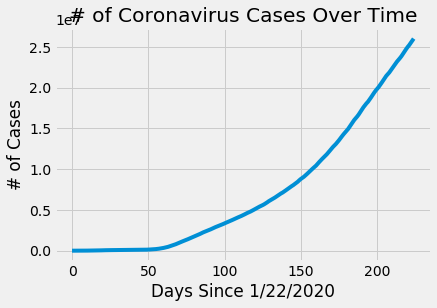

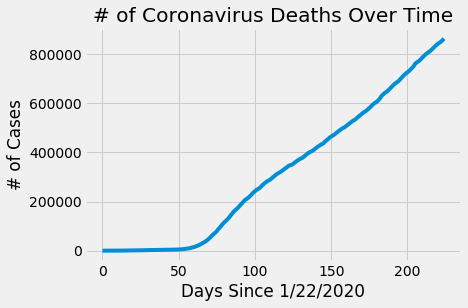

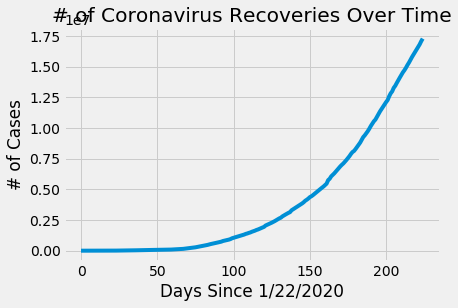

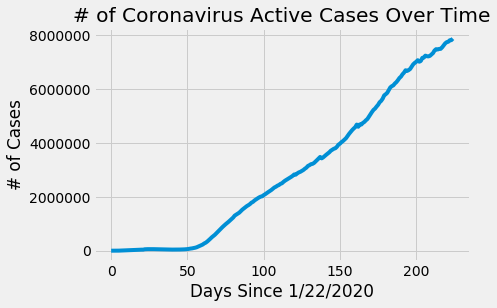

In [10]:
plt.figure(1)
plt.plot(adjusted_dates, total_cases)
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(2)
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(3)
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(4)
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
#Calculate the number of daily increase in total cases, total deaths, total recovered, and total active by time 
daily_increases_total_cases = []
daily_increases_total_deaths = []
daily_increases_total_recovered = []
daily_increases_total_active = []

for i in range(len(total_cases)):
    if i == 0:
        daily_increases_total_cases.append(0)
        daily_increases_total_deaths.append(0)
        daily_increases_total_recovered.append(0)
        daily_increases_total_active.append(0)
    else:
        daily_increases_total_cases.append(total_cases[i] - total_cases[i-1])
        daily_increases_total_deaths.append(total_deaths[i] - total_deaths[i-1])
        daily_increases_total_recovered.append(total_recovered[i] - total_recovered[i-1])
        daily_increases_total_active.append(daily_increases_total_cases[i] - 
                                            (daily_increases_total_deaths[i] + daily_increases_total_recovered[i]))
        
        

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

Text(0, 0.5, '# of Cases')

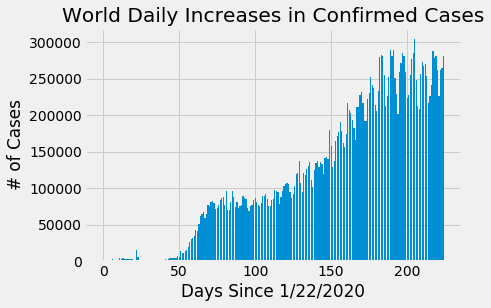

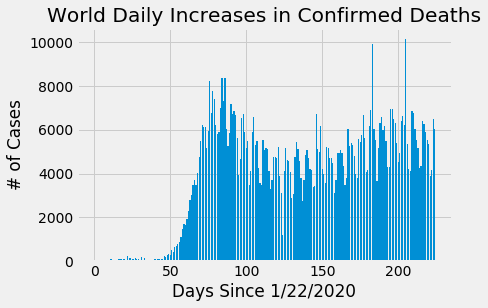

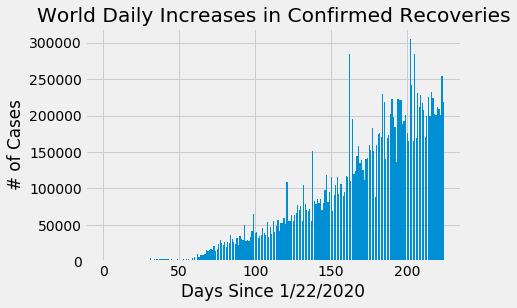

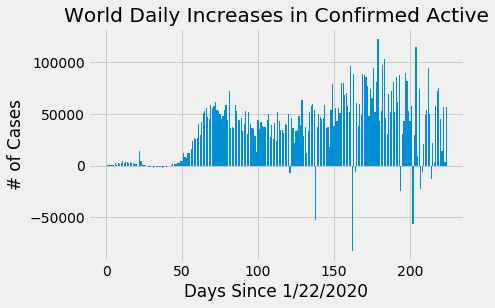

In [12]:
plt.figure(1)
plt.bar(adjusted_dates, daily_increases_total_cases)
plt.title('World Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(2)
plt.bar(adjusted_dates, daily_increases_total_deaths)
plt.title('World Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(3)
plt.bar(adjusted_dates, daily_increases_total_recovered)
plt.title('World Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(4)
plt.bar(adjusted_dates, daily_increases_total_active)
plt.title('World Daily Increases in Confirmed Active')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [13]:
#the global mortality and recovered rate in percentage by time.
mortality_rate_in_percentage = [i*100 for i in mortality_rate]
recovery_rate_in_percentage = [i*100 for i in recovery_rate]

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

<Figure size 432x288 with 0 Axes>

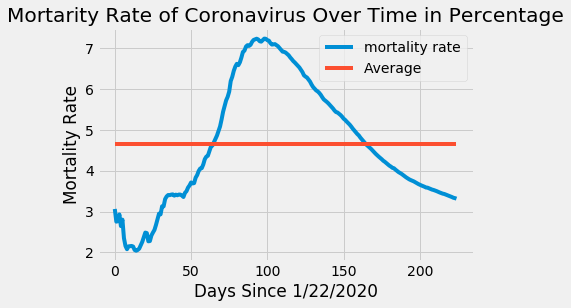

In [14]:
#get the average mortality rate of all the time
avg_mortality_rate = np.mean(mortality_rate_in_percentage)
#Transform the list into dataframe
mortality_rate_in_percentage_df = pd.DataFrame({'mortality rate':mortality_rate_in_percentage, 'Average':avg_mortality_rate})

#Visualize the mortality rate in by time (day units) using the line chart.
#
#Using the dashline to visualize the average mortality rate.
plt.figure()
mortality_rate_in_percentage_df.plot()
plt.title('Mortarity Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Mortality Rate')
plt.legend()

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

<Figure size 432x288 with 0 Axes>

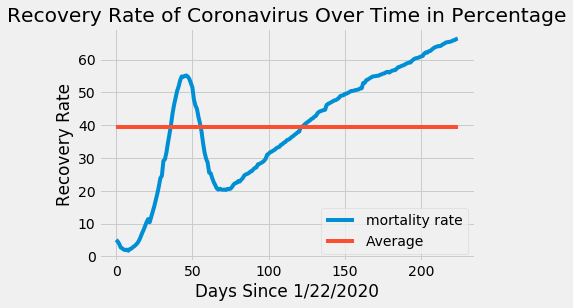

In [15]:
#get the average recovery rate of all the time
avg_recovery_rate = np.mean(recovery_rate_in_percentage)
#Transform the list into dataframe
recovery_rate_in_percentage_df = pd.DataFrame({'mortality rate': recovery_rate_in_percentage, 'Average':avg_recovery_rate})

#Visualize the mortality rate in by time (day units) using the line chart.
#
#Using the dashline to visualize the average mortality rate.
plt.figure()
recovery_rate_in_percentage_df.plot()
plt.title('Recovery Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Recovery Rate')
plt.legend()

#  5. Continent Analysis

## Data Prerocessing

In [16]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [17]:
#getting continent code for country
confirmed_df_continent = []
deaths_df_continent = []
recoveries_df_continent = []

for i in range(len(confirmed_df)):
    confirmed_df_country = confirmed_df['Country/Region'][i]
    deaths_df_country = confirmed_df['Country/Region'][i]
    
    confirmed_df_continent_code = country_to_continent_code(confirmed_df_country)
    deaths_df_continent_code = country_to_continent_code(deaths_df_country)
    
    confirmed_df_continent.append(continents[confirmed_df_continent_code])
    deaths_df_continent.append(continents[deaths_df_continent_code])

for i in range(len(recoveries_df)):
    recoveries_df_country = recoveries_df['Country/Region'][i]
    recoveries_df_continent_code = country_to_continent_code(recoveries_df_country)
    recoveries_df_continent.append(continents[recoveries_df_continent_code])

    
#add the field "continent" into: 
confirmed_df['continent'] = confirmed_df_continent
deaths_df['continent'] = deaths_df_continent
recoveries_df['continent'] = recoveries_df_continent

In [18]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/25/20  8/26/20  8/27/20  \
0        0        0        0        0  ...    38070    38113    38129   
1        0        0        0        0  ...     8759     8927     9083   
2        0        0        0        0  ...    42228    42619    43016   
3        0        0        0        0  ...     1060     1098     1098   
4        0        0        0        0  ...     2283     2332     2415   

   8/28/20  8/29/20  8/30/20  8/31/20  9/1/20  9/2/20  continent  
0    38140    38143    38162    38165   38196   38243       Asia  
1     9195     9279     9380     9513    9606    9728     Europe  
2    43403    43781    44146    44494   44833   45158     Africa  
3     1124     1124     1124     1176    1184    1199     Europe  
4     2471     2551     2624     2654    2729    2777     Africa  

[5 rows x 230 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Confirmed: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [34]:
#columns for contries_df data frame
continent = []
Confirmed = list(confirmed_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Deaths = list(deaths_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Recoveries = list(recoveries_df.groupby('Country/Region').sum().loc[:, cols[-1]])
Active = []
Mortality_rate = []

countries = sorted(list(set(confirmed_df['Country/Region'])))
countries_df = pd.DataFrame()
countries_df['Country/Region'] = countries
countries_df['Lat'] = confirmed_df['Lat']
countries_df['Long'] = confirmed_df['Long']
countries_df['continent'] = confirmed_df['continent']
countries_df['Confirmed'] = Confirmed
countries_df['Deaths'] = Deaths
countries_df['Recoveries'] = Recoveries
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Deaths'] + countries_df['Recoveries'])
countries_df['Mortality Rate'] = (countries_df['Deaths'] / countries_df['Confirmed'])*100.00

countries_df = countries_df.set_index('Country/Region')
countries_df

Lat       Long continent  Confirmed  Deaths  \
Country/Region                                                          
Afghanistan         33.939110  67.709953      Asia      38243    1409   
Albania             41.153300  20.168300    Europe       9728     296   
Algeria             28.033900   1.659600    Africa      45158    1523   
Andorra             42.506300   1.521800    Europe       1199      53   
Angola             -11.202700  17.873900    Africa       2777     112   
...                       ...        ...       ...        ...     ...   
West Bank and Gaza -18.665695  35.529562    Africa      23875     162   
Western Sahara     -22.957600  18.490400    Africa         10       1   
Yemen               28.166700  84.250000      Asia       1976     571   
Zambia              12.521100 -69.968300    Europe      12415     292   
Zimbabwe            12.178400 -68.238500    Europe       6638     206   

                    Recoveries  Active  Mortality Rate  
Country/Region                                          
Afghanistan              29315    7519        3.684334  
Albania                   5582    3850        3.042763  
Algeria                  31746   11889        3.372603  
Andorra                    909     237        4.420350  
Angola                    1115    1550        4.033129  
...                        ...     ...             ...  
West Bank and Gaza       15483    8230        0.678534  
Western Sahara               8       1       10.000000  
Yemen                     1175     230       28.896761  
Zambia                   11494     629        2.351994  
Zimbabwe                  5250    1182        3.103344  

[188 rows x 8 columns]


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [20]:
#columns for contries_df data frame
continent = []
Confirmed = list(confirmed_df.groupby('continent').sum().loc[:, cols[-1]])
Deaths = list(deaths_df.groupby('continent').sum().loc[:, cols[-1]])
Recoveries = list(recoveries_df.groupby('continent').sum().loc[:, cols[-1]])
Active = []
Mortality_rate = []

continent = sorted(list(set(confirmed_df['continent'])))
continent_df = pd.DataFrame()
continent_df['continent'] = continent
continent_df['Confirmed'] = Confirmed
continent_df['Deaths'] = Deaths
continent_df['Recoveries'] = Recoveries
continent_df['Active'] = continent_df['Confirmed'] - (continent_df['Deaths'] + continent_df['Recoveries'])
continent_df['Mortality Rate'] = (continent_df['Deaths'] / continent_df['Confirmed'])*100.00

continent_df = continent_df.set_index('continent')
continent_df

Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa           1268106   30319     1007212   230575        2.390888
Asia             7278203  145408     5843325  1289470        1.997856
Australia          28308     707       23567     4034        2.497527
Europe           3688672  208551     2009164  1470957        5.653823
North America    7279009  270981     3111697  3896331        3.722773
Others             38323     672       25325    12326        1.753516
South America    6450789  206390     5271584   972815        3.199454

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [21]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats): 
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [112]:
continent = set(confirmed_df['continent'])
confirmed = confirmed_df.groupby('continent').sum()
deaths = deaths_df.groupby('continent').sum()

#deaths = deaths_df.groupby('continent').sum()
visualize_covid_cases(confirmed, deaths, continent=continent, figure=)



TypeError: 'function' object is not subscriptable

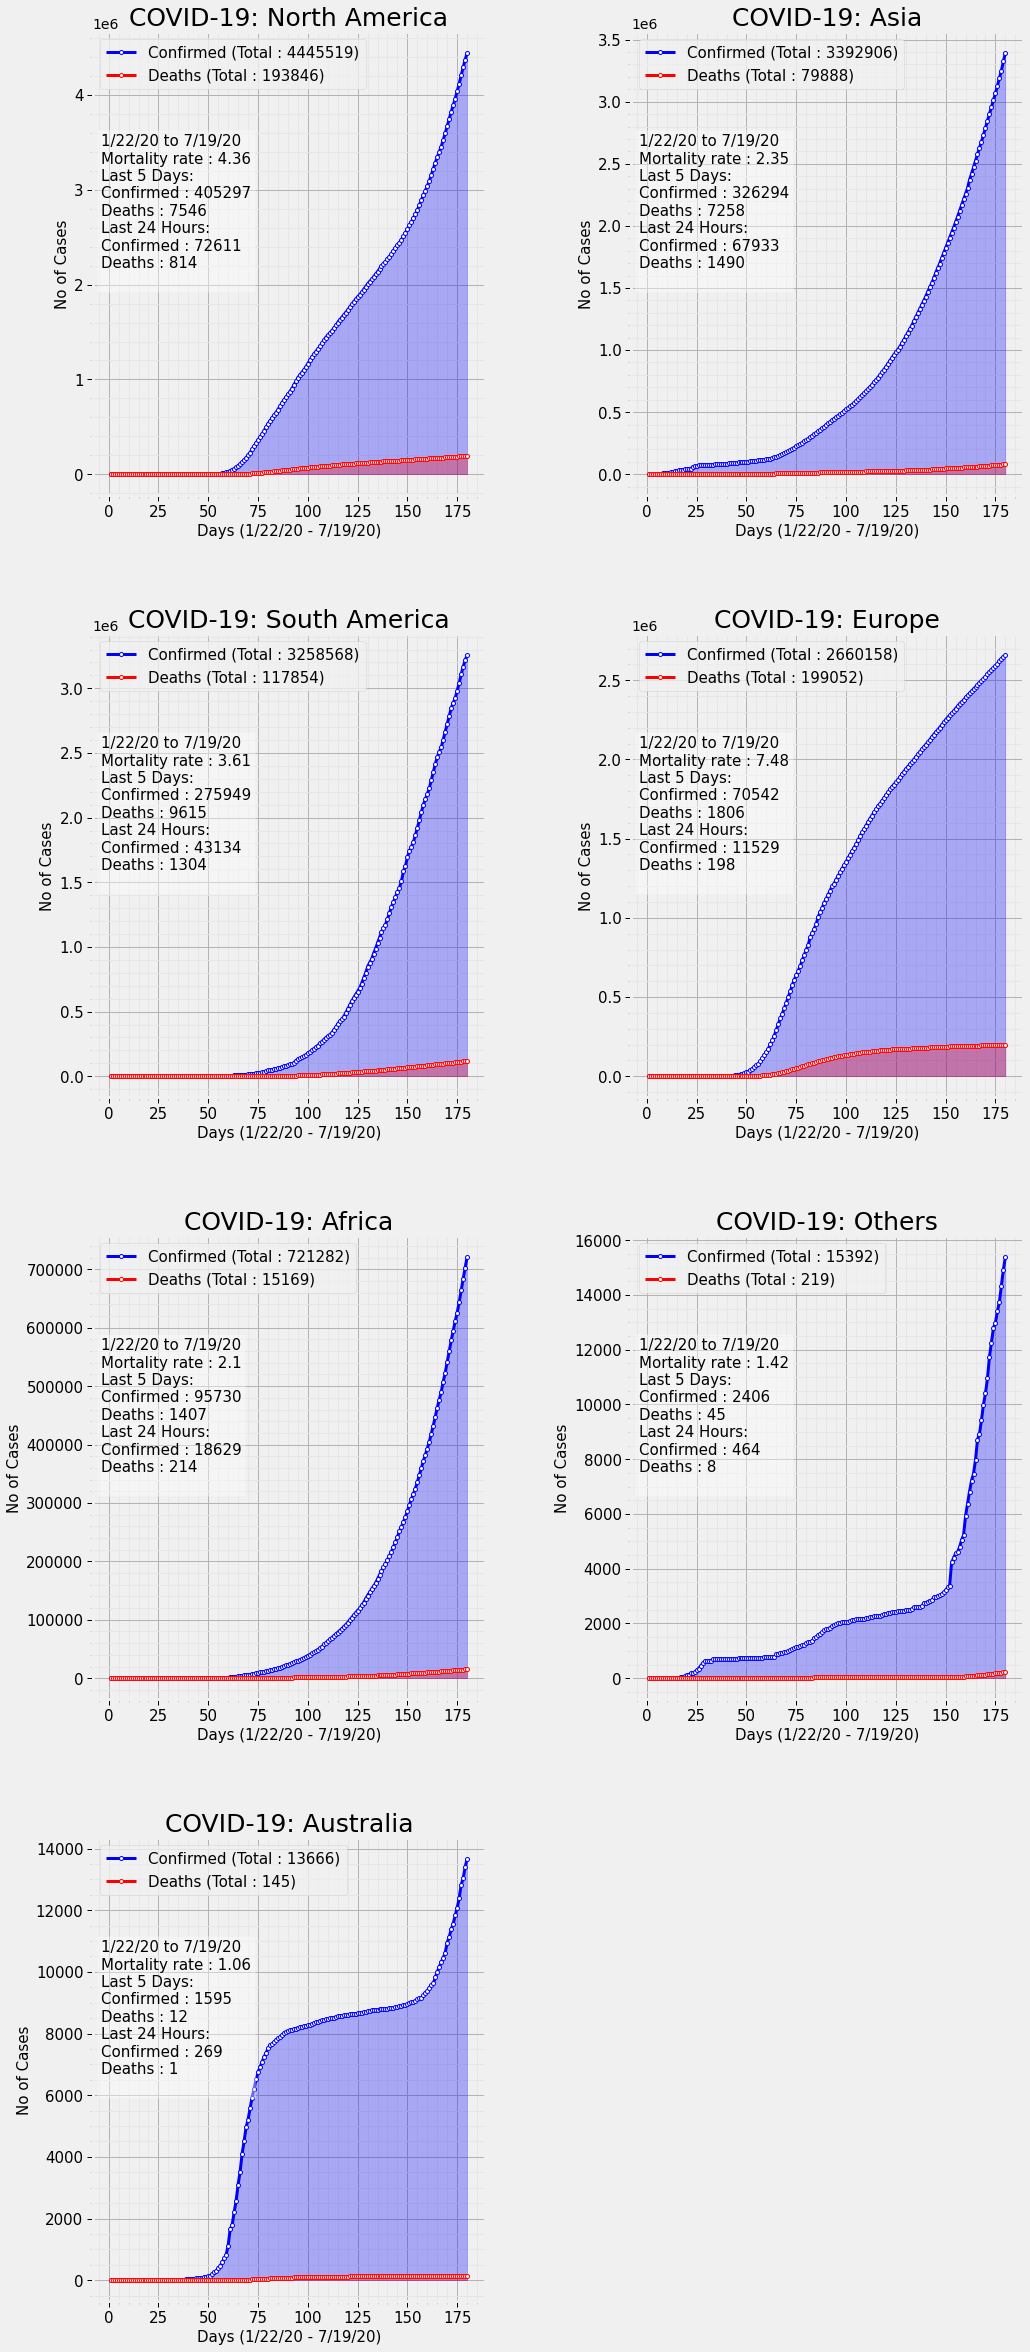


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

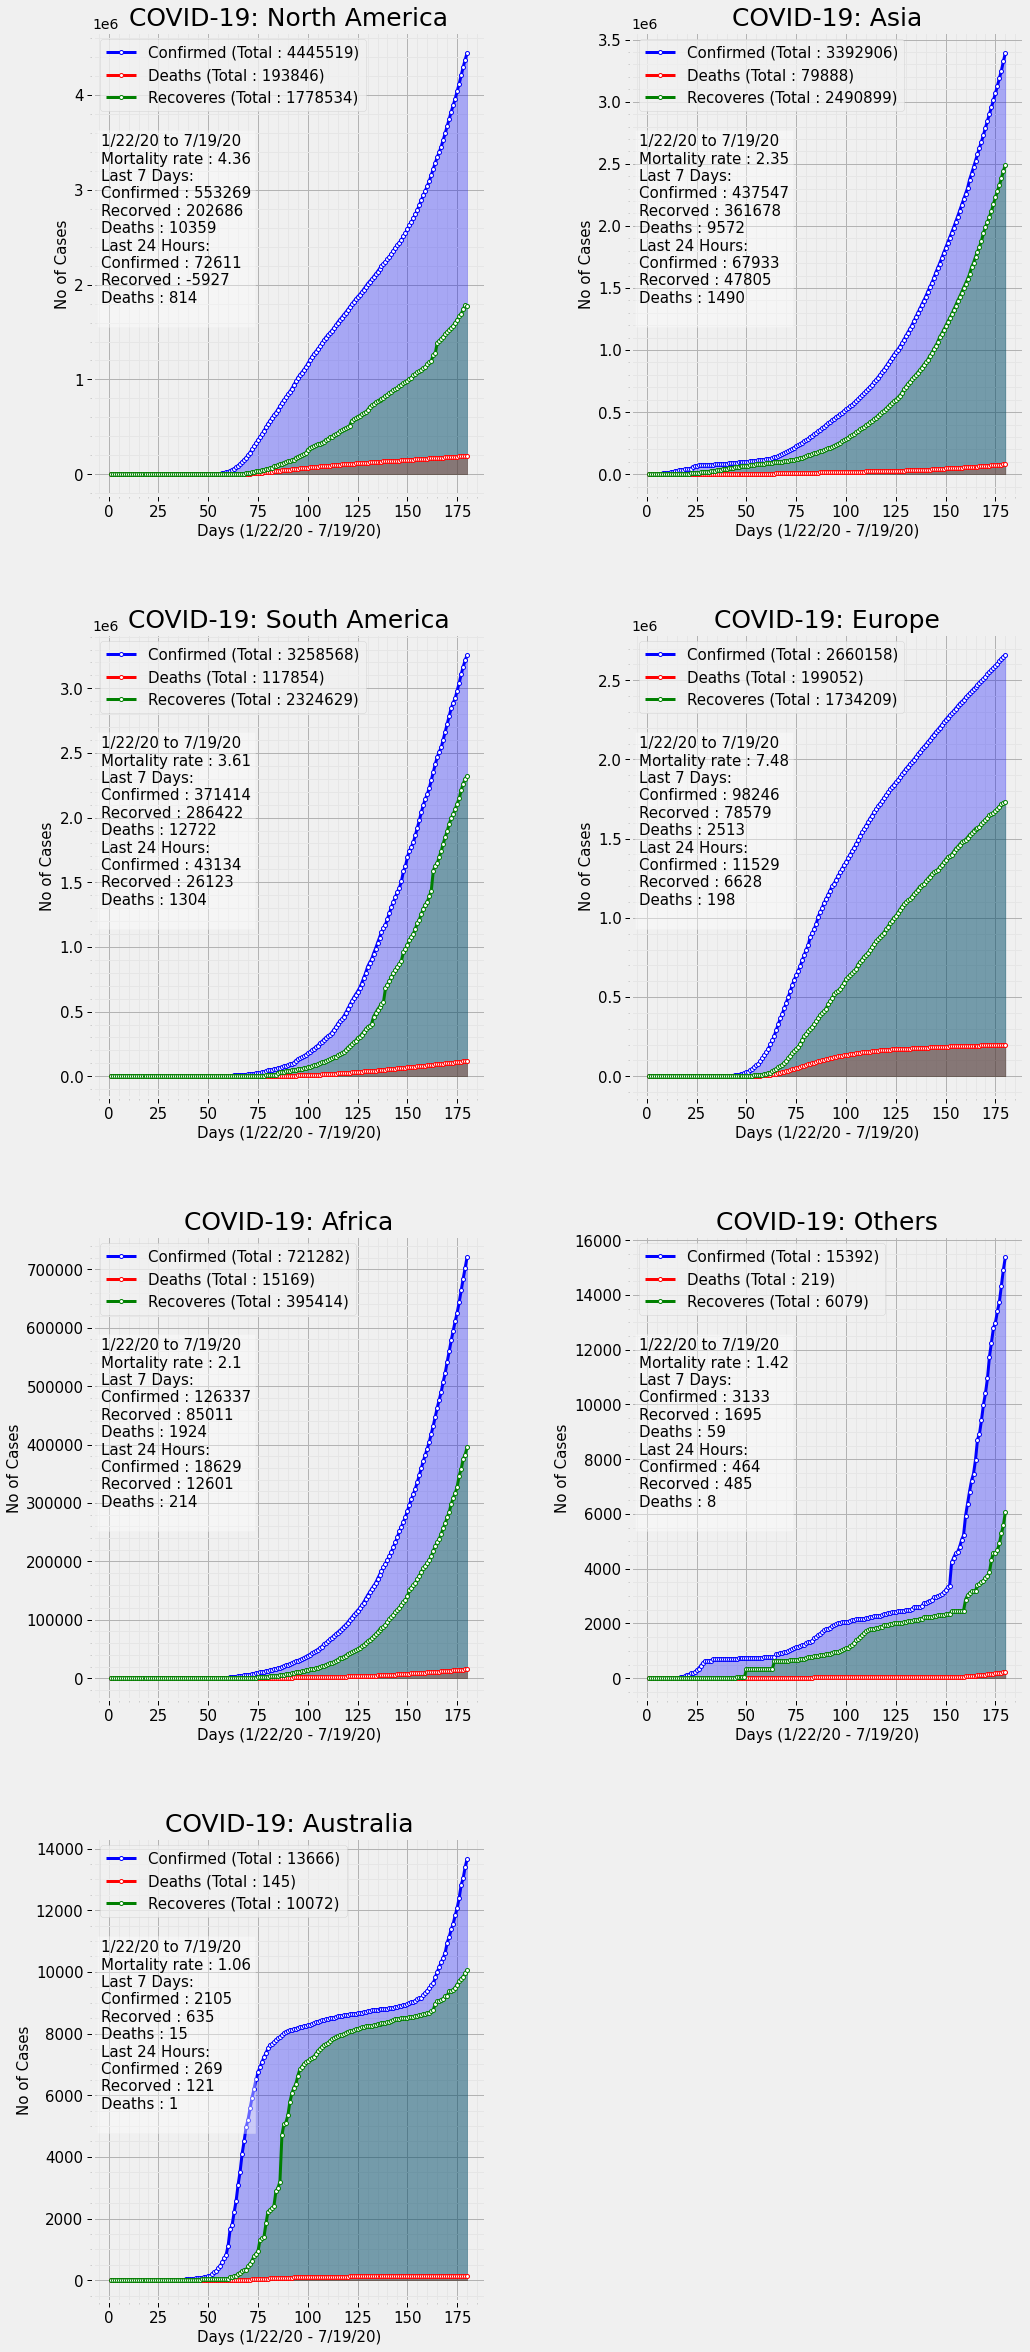

In [22]:
#Insert your code here:


# Problem 12
    Visualize the covariance matrix for continents_df.

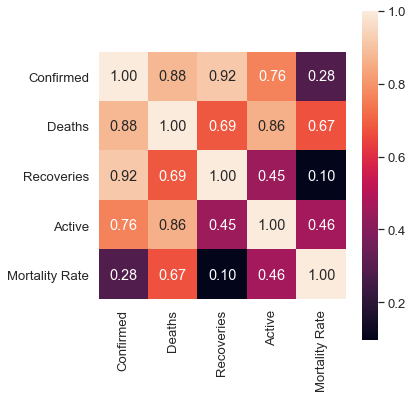

In [49]:
cols = continent_df.columns
covariance = continent_df.corr()

plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
hm = sns.heatmap(covariance,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                )
hm.set_xticklabels(cols , rotation=90 ) ;

plt.tight_layout()
plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

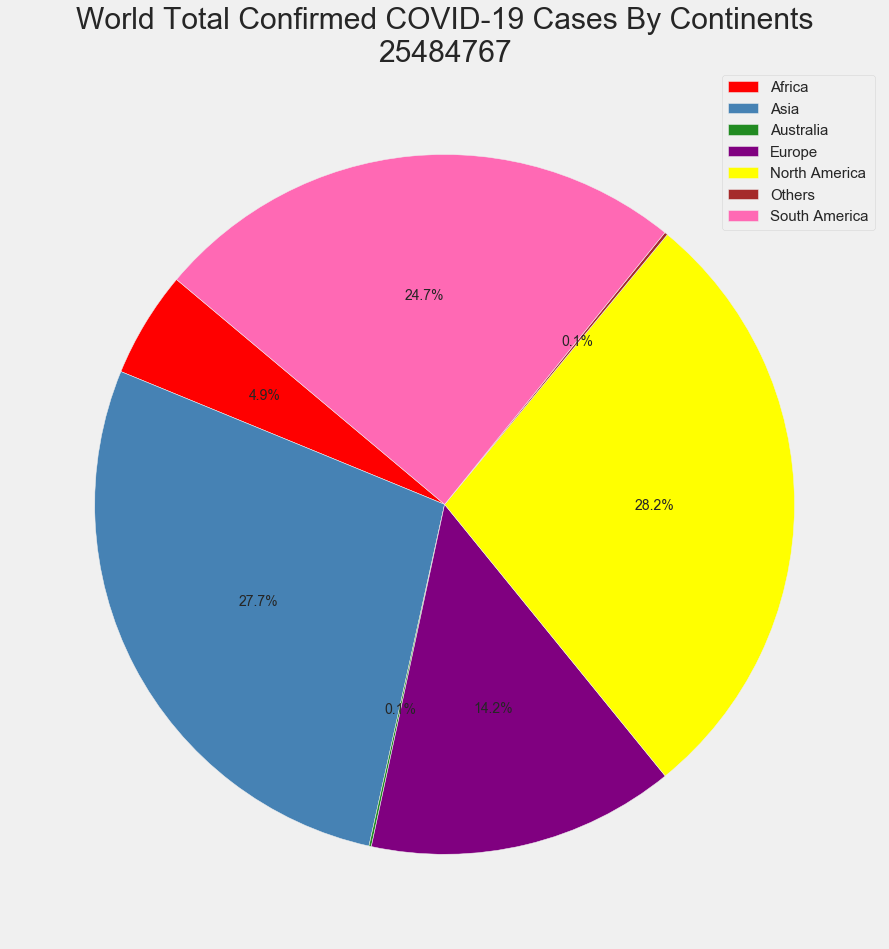

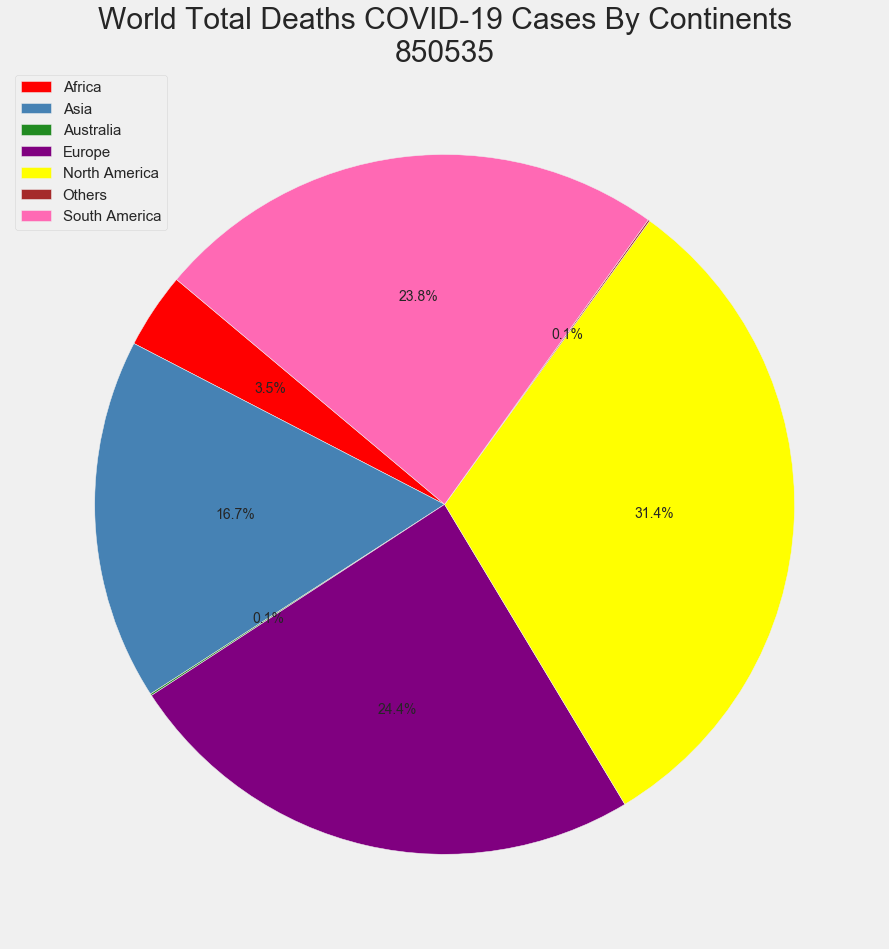

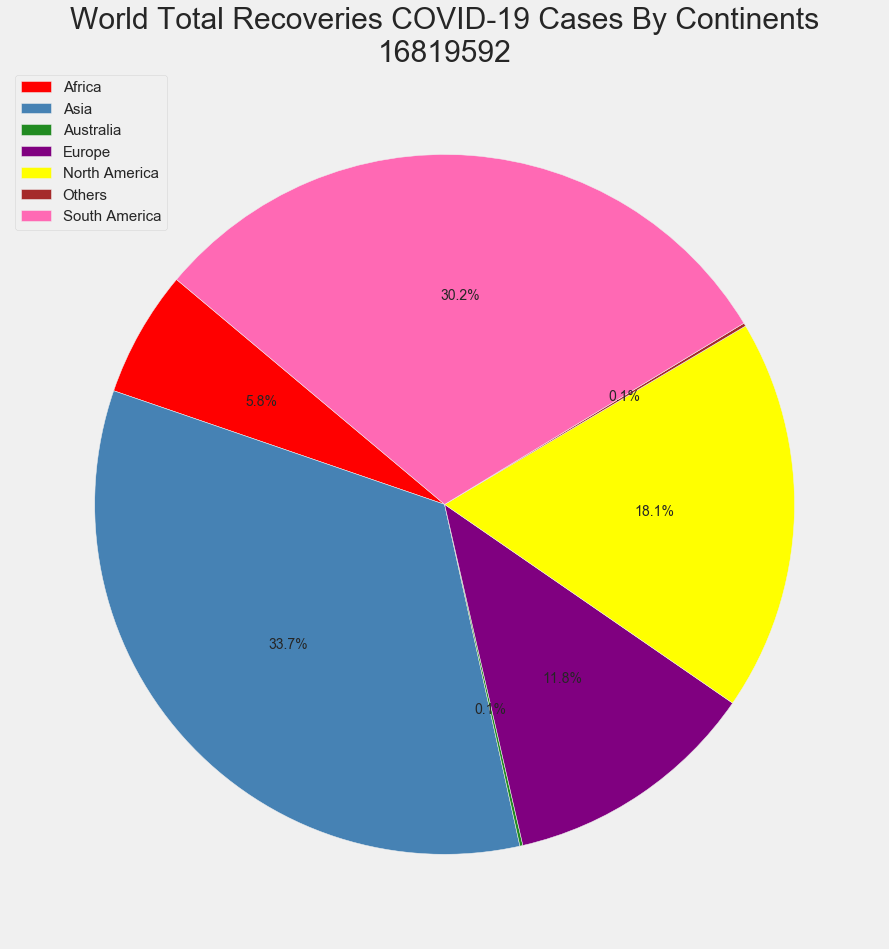

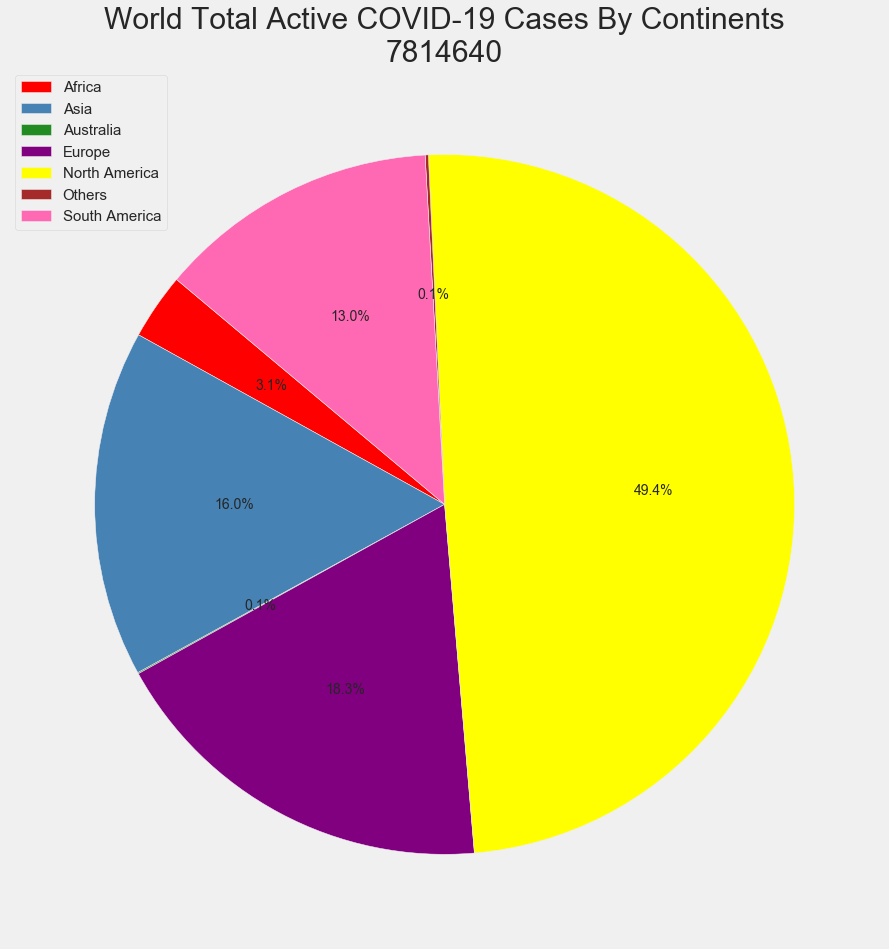

In [138]:
#get the number of confirmed, deaths, recoveries, and active of the 7 continents.
confirmed_by_continent = continent_df['Confirmed']
deaths_by_continent = continent_df['Deaths']
recoveries_by_continent = continent_df['Recoveries']
active_by_continent = continent_df['Active']

#set up for pie chart
colors = ['red', '#4682b4', '#228b22', '#800080', '#ffff00', '#a52a2a', '#ff69b4']
labels = continent_df.index
title1 = 'World Total Confirmed COVID-19 Cases By Continents\n' + str(sum(confirmed_by_continent)) #total of confirmed cases
title2 = 'World Total Deaths COVID-19 Cases By Continents\n' + str(sum(deaths_by_continent))
title3 = 'World Total Recoveries COVID-19 Cases By Continents\n' + str(sum(recoveries_by_continent))
title4 = 'World Total Active COVID-19 Cases By Continents\n' + str(sum(active_by_continent))

#plot confirmed cases in pie chart
plt.figure(1, figsize=(15,15))
plt.pie(confirmed_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title1, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot deaths cases in pie chart
plt.figure(2, figsize=(15,15))
plt.pie(deaths_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title2, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot recoveries cases in pie chart
plt.figure(3, figsize=(15,15))
plt.pie(recoveries_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title3, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)

#plot active cases in pie chart
plt.figure(4, figsize=(15,15))
plt.pie(active_by_continent, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(title4, fontsize=30)
plt.legend(labels, loc='best', fontsize=15)
plt.show()



# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [159]:
from geopy.geocoders import Nominatim

In [161]:
geolocator = Nominatim(user_agent="Worldmap for countries in 2016")
latitude = []
long = []
for i in countries_df.index:
    if i != None:
        location = geolocator.geocode(i)
        if location!=None:
            latitude.append(location.latitude)#, location.longitude)
            long.append(location.longitude)
        else:
            latitude.append(float("Nan"))#, location.longitude)
            long.append(float("Nan"))
    else:
        latitude.append(float("Nan"))#, location.longitude)
        long.append(float("Nan"))
        
countries_df["Latitude"] = latitude
countries_df['Longtitude'] = long

In [163]:
plt.figure(figsize=(20,10))
m2=folium.Map(location=[33.768006,66.238514], )
m2


<Figure size 1440x720 with 0 Axes>

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [26]:
#Insert your code here:



/home/hana/hana/env37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log10



# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [35]:
top_10_countries_by_confirmed_case = countries_df.sort_values('Confirmed',ascending=False).head(10)
top_10_countries_by_confirmed_case.head(10)

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             35.937500   14.375400         Europe    6113510  185720   
Brazil          50.833300    4.469936         Europe    3997865  123780   
India           35.745200   95.995600           Asia    3853406   67376   
Russia          41.902900   12.453400         Others    1001965   17365   
Peru            39.074200   21.824300         Europe     657129   29068   
Colombia        11.550000  104.916700           Asia     633321   20345   
South Africa    35.907757  127.766922           Asia     630595   14389   
Mexico          58.595300   25.013600         Europe     610957   65816   
Spain           41.204380   74.766098           Asia     479554   29194   
Argentina      -38.416100  -63.616700  South America     439172    9118   

                Recoveries   Active  Mortality Rate  
Country/Region                                       
USA                2231757  3696033        3.037862  
Brazil             3387309   486776        3.096153  
India              2970492   815538        1.748479  
Russia              819043   165557        1.733094  
Peru                480177   147884        4.423485  
Colombia            479567   133409        3.212431  
South Africa        553456    62750        2.281813  
Mexico              504541    40600       10.772608  
Spain               150376   299984        6.087740  
Argentina           315530   114524        2.076180

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

TypeError: __init__() got an unexpected keyword argument 'size'

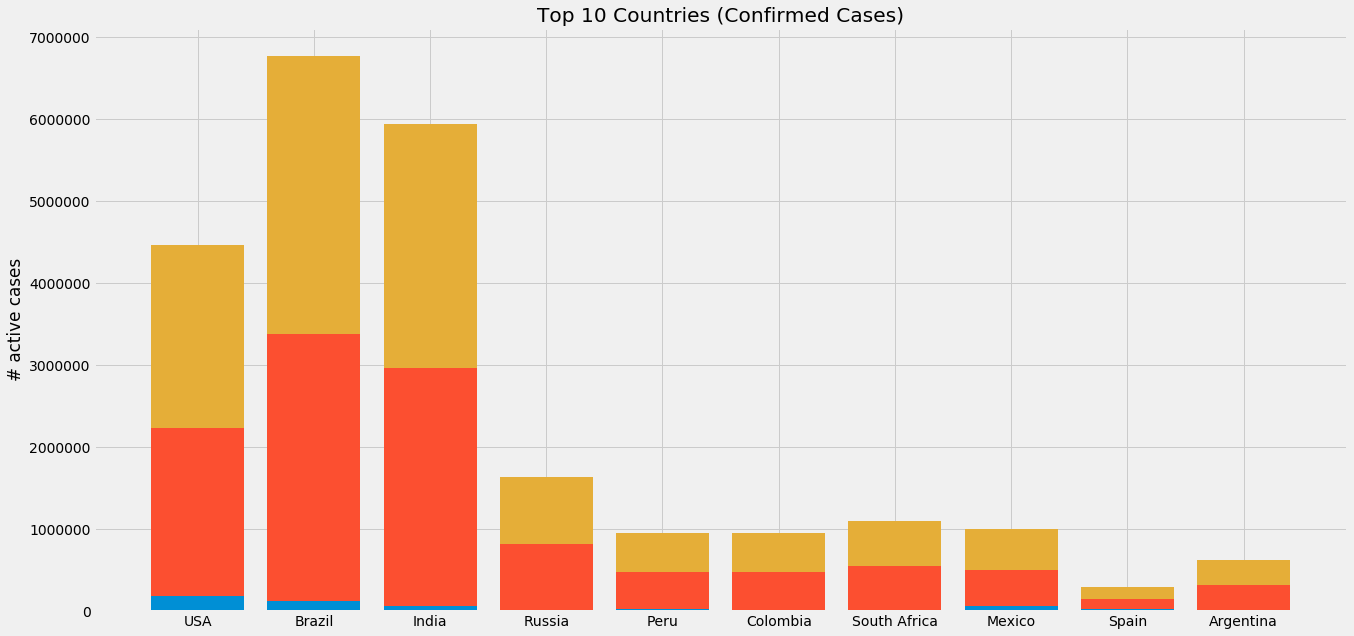

In [42]:
#top 10 confirmed countries with number active, recoveries and deaths cases
top_10_countries_by_deaths_case = top_10_countries_by_confirmed_case['Deaths']
top_10_countries_by_recoveries_case = top_10_countries_by_confirmed_case['Recoveries']
top_10_countries_by_active_case = top_10_countries_by_confirmed_case['Active']
#get countries name for bar chart
labels = top_10_countries_by_active_case.index

plt.figure(1, figsize=(20,10))
plt.bar(labels, top_10_countries_by_deaths_case, label='Deaths')
plt.bar(labels, top_10_countries_by_recoveries_case, bottom=top_10_countries_by_deaths_case,
       label='Recoveries')
plt.bar(labels, top_10_countries_by_recoveries_case, bottom=top_10_countries_by_recoveries_case,
       label='Active')

plt.ylabel('# active cases')
plt.title('Top 10 Countries (Confirmed Cases)')
plt.legend(size=5)

plt.show()

In [28]:
#Insert your code here:


# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

# Problem 21
**USA dataset**

In [29]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [30]:
#Insert your code here:

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [31]:
#Insert your code here: